In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [7]:
salary_train = pd.read_csv('D:/ExcelRassignments/Assignment12/SalaryData_Train.csv')
salary_test = pd.read_csv('D:/ExcelRassignments/Assignment12/SalaryData_Test.csv')

In [8]:
import os 
import glob

In [10]:
extension = 'csv'
all_filename=[i for i in glob.glob('*.{}'.format(extension))]

# combined the files
salary_data=pd.concat([salary_train,salary_test])

#export to csv
salary_data.to_csv("salary_data.csv", index=False, encoding='utf-8-sig')

In [11]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## EDA

In [12]:
salary_df=salary_data.copy()

In [13]:
salary_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
#Drop the Columns
salary_df1=salary_df.drop(['age','educationno','capitalgain','capitalloss','hoursperweek'], axis=1)

In [15]:
salary_df1.head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [16]:
# Data Strucature
salary_df1.shape

(45221, 9)

In [17]:
# Duplicates
#salary_df1[salary_df1.duplicated()].shape

<AxesSubplot:>

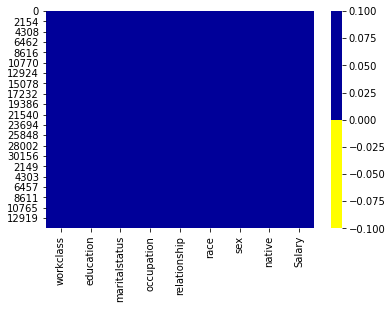

In [18]:
# Missing Values and Imputation
import seaborn as sns
cols=salary_df1.columns
colours=['#ffff00','#000099']
sns.heatmap(salary_df1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [19]:
salary_df1.isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [20]:
import sweetviz as sv
sweet_report=sv.analyze(salary_df1)
sweet_report.show_html("Salary_Data_EDA_Report.html")

                                             |                                             | [  0%]   00:00 ->…

Report Salary_Data_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Label Encoder

In [21]:
labelencoder=LabelEncoder()

In [22]:
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

In [23]:
salary_df1[cols]=salary_df1[cols].apply(LabelEncoder().fit_transform)

In [24]:
salary_df1.head()   # <=50K =0 , >50K=1

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,5,9,4,0,1,4,1,37,0
1,4,9,2,3,0,4,1,37,0
2,2,11,0,5,1,4,1,37,0
3,2,1,2,5,0,2,1,37,0
4,2,9,2,9,5,2,0,4,0


### Splitting data into Training and Testing dataset

In [25]:
x=salary_df1.iloc[:,0:9]
y=salary_df1['Salary']

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.333011) # test data is 33.30% and Train data is 66.70

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30161, 9), (15060, 9), (30161,), (15060,))

### Gaussian Naive Bayes Model

In [28]:
#Import Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussion Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train, y_train)

GaussianNB()

In [29]:
# Predict Output
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Accuracy

In [30]:
acc=accuracy_score(y_test, y_pred)*100
print("Accuracy:", acc)

Accuracy: 100.0


## Confusion Matrix

In [31]:
confusion_matrix(y_test, y_pred)

array([[11380,     0],
       [    0,  3680]], dtype=int64)

### Calculate class probabilities

In [32]:
y_pred_prob=model.predict_proba(x_test)[0:10]

In [33]:
y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [34]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [35]:
#print the first 10 predicted probabilities for class 1 - Probability of >50K

y_pred_prob=model.predict_proba(x_test)[0:10,1]

In [36]:
y_pred_prob

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [37]:
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = model.predict_proba(x_test)[:, 1]

In [38]:
y_pred1

array([0., 0., 0., ..., 0., 0., 0.])

Text(0, 0.5, 'Frequency')

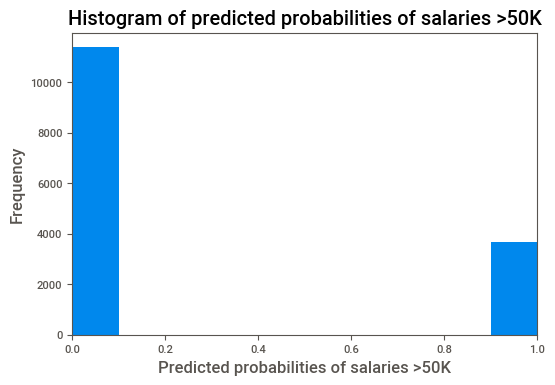

In [39]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

## Interpretation
### We can see above histogram is highly positive skewed and the first column tell us that approximately 11255 observations with probability between 0.0 to 0.1.
### As per confusion matrix analysis majority of observations predict that the salary will be <=50K. Salary has been classified correctly with 100% accuracy and as per confusion matrix analysis there is no missclassification in the dataset.